In [8]:
import plotly.express as px
import numpy as np
import nibabel as nib
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
from glob import glob
import argparse

import sys
sys.path.append('../../modified_medsam_repo')
from MedSAM_HCP.dataset import MRIDataset, load_datasets
from MedSAM_HCP.MedSAM import MedSAM, medsam_inference
from MedSAM_HCP.build_sam import build_sam_vit_b_multiclass
from MedSAM_HCP.utils_hcp import *


In [6]:
dicto = {
    'Brats_MedSAM': '/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_10-17-24/region_animations/001/medsam/fused.gif',
    'RegisteredBrats_MedSAM': '/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/registered_hcp_experiment_10-26-24/region_animations/brats_001_registered/singletask_unprompted/fused.gif',
    'Brats_UNet': '/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_10-17-24/region_animations/001/unet/fused.gif',
    'RegisteredBrats_UNet': '/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/registered_hcp_experiment_10-26-24/region_animations/brats_001_registered/singletask_unet/fused.gif'
}



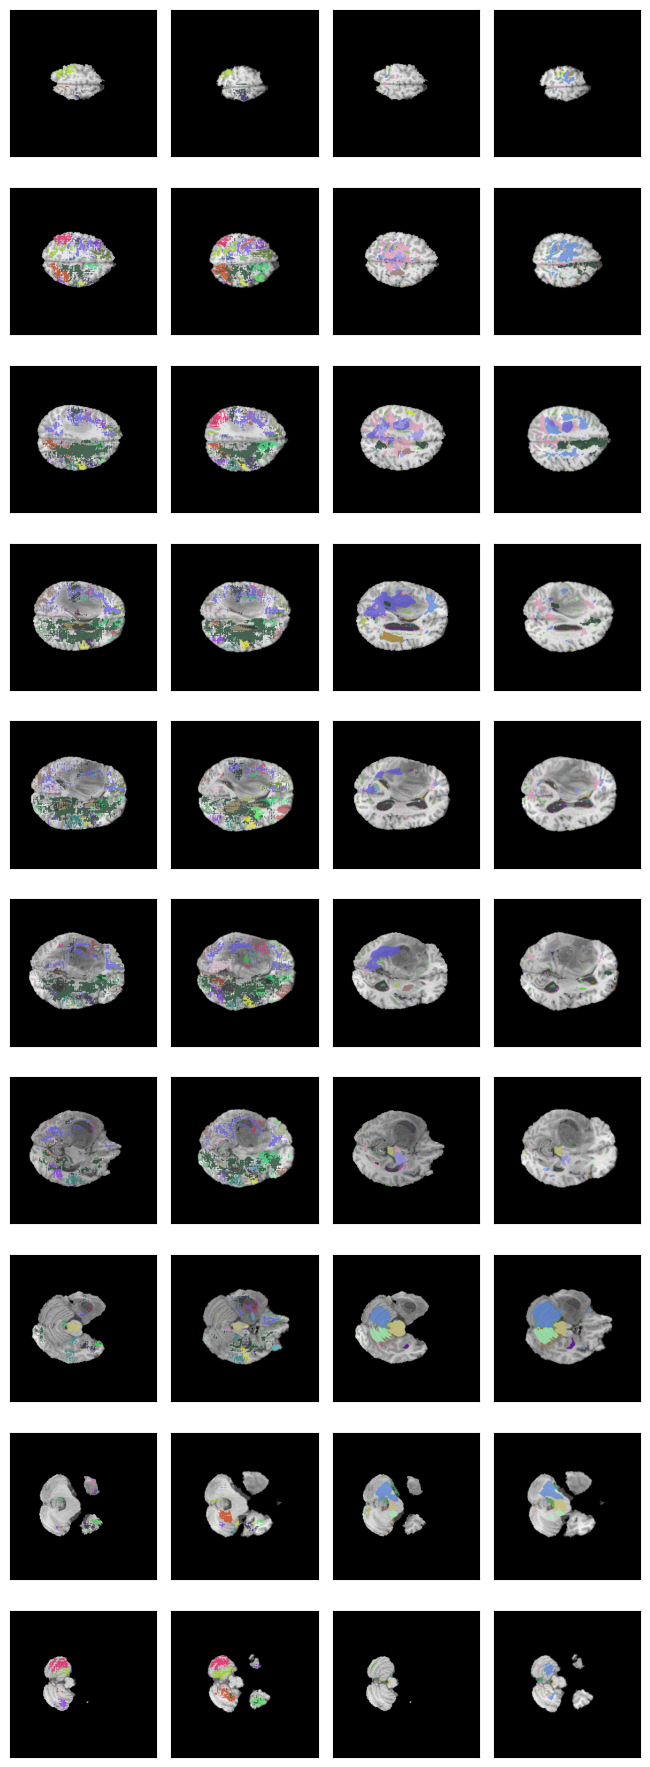

In [129]:
def open_gif(path):
    arr_list = []
    with Image.open(path) as im:
        for i, frame in enumerate(ImageSequence.Iterator(im)):
            if i == 0:
                continue
            arr_list.append(np.array(frame).reshape((1,256,256,3)))
    arr = np.concatenate(arr_list, axis=0)
    return arr

def generate_plot(labels = [], slices = [], do_offset = [], factor=0.8):
    fig, axs = plt.subplots(len(slices), len(labels), figsize=(3.3/2*len(labels), 18 / 10 * len(slices)))

    for i, label in enumerate(labels):
        path = dicto[label]
        arr = open_gif(path)
        for j in range(len(slices)):
            if do_offset[i]:
                # middle maps to middle
                # (slices[j] - 128)
                # if want x < middle -> int((middle - x) * 0.8) + middle
                #middle = arr.shape[0] // 2
                #new_slice = middle + int( (slices[j] - middle) * factor)
                new_slice = int(slices[j] * factor)
                axs[j, i].imshow(arr[new_slice, :, :, :])
            else:
                axs[j, i].imshow(arr[slices[j], :, :, :])
            axs[j, i].set_xticks([])
            axs[j, i].set_yticks([])
    fig.tight_layout()
    return fig

num = 10
slices = np.linspace(0, arr.shape[0], num = num + 2, dtype=int)
slices = slices[1:-1]
fig =generate_plot(labels = ['Brats_MedSAM', 'RegisteredBrats_MedSAM',
    'Brats_UNet', 'RegisteredBrats_UNet'],
    slices = slices, do_offset = [True, False, True, False], factor = .9375)

fig.savefig('/gpfs/home/kn2347/figs/brats_vs_registeredbrats_medsam_unet.pdf', dpi = 300)
#arr = open_gif(dicto['Brats_UNet'])

In [40]:
slices

array([  0.        ,  15.11111111,  30.22222222,  45.33333333,
        60.44444444,  75.55555556,  90.66666667, 105.77777778,
       120.88888889, 136.        ])

(0.0, 1.0, 0.0, 1.0)

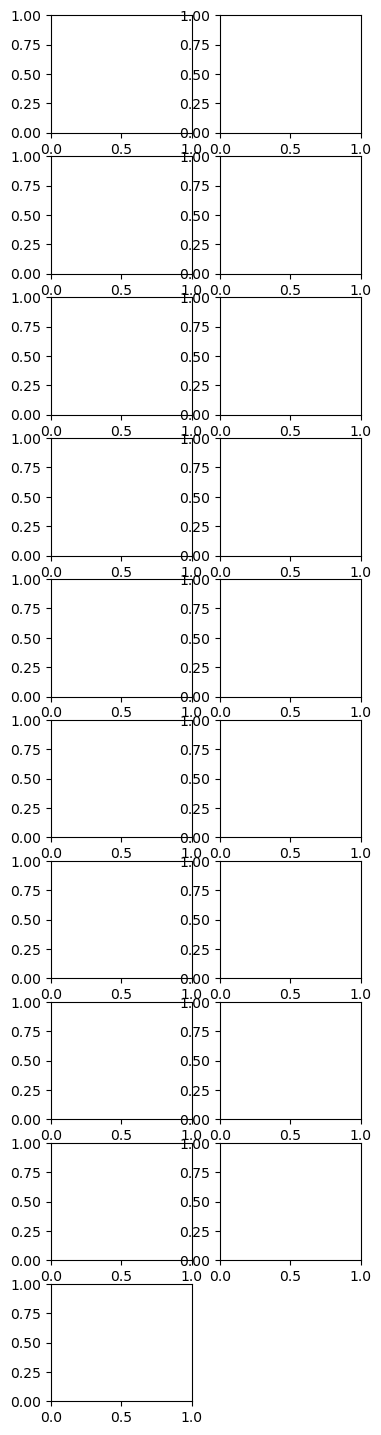

In [64]:

#print(slices)

for i in range(num):
    axs[i, 0] = plt.imshow()
